In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('co2.csv')

In [3]:
df.describe()

,engine,cylandr,fuelcomb,out1
count,500.000000,500.000000,500.000000,500.000000
mean,3.600400,6.132000,12.476600,268.026000
std,1.478191,1.832291,3.943025,67.099673
min,1.000000,4.000000,4.800000,110.000000
25%,2.000000,4.000000,9.500000,217.000000
50%,3.600000,6.000000,11.650000,260.000000
75%,5.000000,8.000000,14.800000,317.000000
max,6.800000,12.000000,25.800000,488.000000


<Axes: xlabel='out1', ylabel='count'>

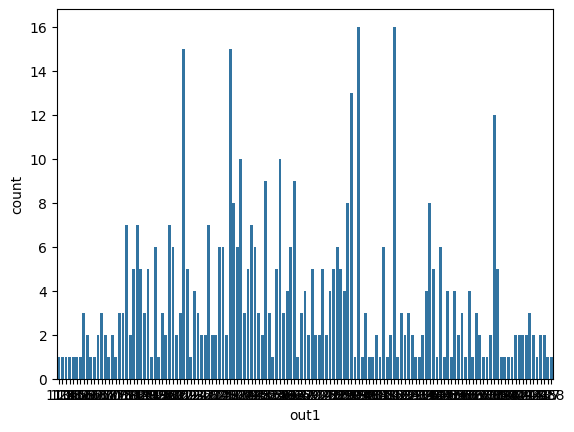

In [4]:
sns.countplot(x='out1',data=df)

<Axes: >

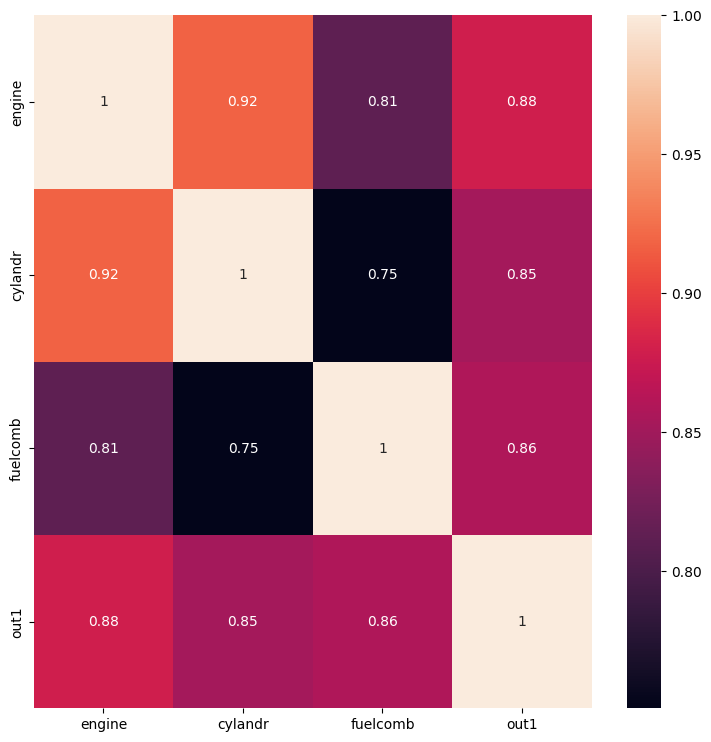

In [5]:
plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

In [20]:
x=df.drop('out1',axis=1)
#x= x.drop("fuelcomb",axis=1)
#x= x.drop("cylandr",axis=1)
y=df['out1']

In [21]:
x

,engine,cylandr,fuelcomb
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
495,1.5,4,6.9
496,1.5,4,7.5
497,1.5,4,7.7
498,3.5,6,10.6


In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
X_test

,engine,cylandr,fuelcomb
78,2.0,4,8.8
129,3.0,6,11.0
97,3.0,6,10.3
151,2.0,4,10.7
462,6.2,8,14.3
...,...,...,...
155,2.4,4,9.5
338,1.4,4,6.8
122,4.4,8,14.7
150,2.0,4,9.8


In [24]:
model=linear_model.LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
out_robot=model.predict(X_test)

In [27]:
X_test.size

300

In [28]:
out_robot

array([199.72335544, 249.17469036, 244.61238515, 212.10675529,
       332.71913903, 348.42693999, 302.37715715, 252.68669904,
       207.54445008, 356.83418085, 385.49743182, 286.24262544,
       209.49972374, 313.2320141 , 258.39310456, 336.04354014,
       183.09648129, 185.8629283 , 187.16644407, 335.97792846,
       242.00535361, 299.78422166, 192.55401868, 247.2194167 ,
       313.29762577, 211.05645876, 217.00198747, 237.4430484 ,
       303.36439877, 251.95523342, 209.49972374, 206.89269219,
       296.01899374, 291.80626831, 185.8629283 , 173.65303996,
       232.2289853 , 206.89269219, 204.61858762, 311.27674043,
       187.16644407, 273.54295142, 331.41562325, 343.14726522,
       203.96682973, 174.70333649, 190.26581805, 305.14360416,
       207.22561916, 189.12171773, 178.21534517, 209.49972374,
       194.01694991, 249.17469036, 210.15148163, 257.82105441,
       383.26972936, 293.58803046, 197.11632389, 249.82644825,
       253.91050708, 270.29825804, 199.07159755, 341.00

In [29]:
y_test

,out1
78,202
129,253
97,237
151,246
462,329
...,...
155,218
338,156
122,338
150,225


In [35]:
X_test

,engine,cylandr,fuelcomb
78,2.0,4,8.8
129,3.0,6,11.0
97,3.0,6,10.3
151,2.0,4,10.7
462,6.2,8,14.3
...,...,...,...
155,2.4,4,9.5
338,1.4,4,6.8
122,4.4,8,14.7
150,2.0,4,9.8


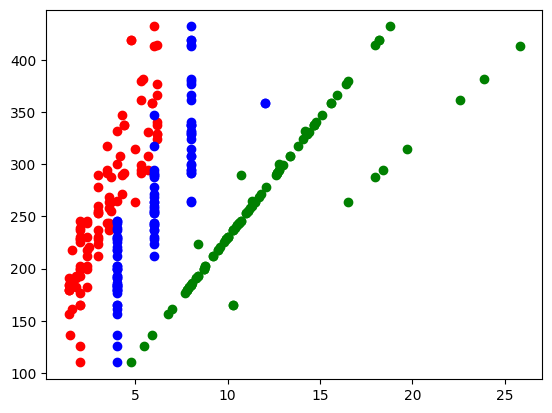

In [34]:
plt.scatter(X_test.engine,y_test, color='red')
plt.scatter(X_test.fuelcomb,y_test, color='green')
plt.scatter(X_test.cylandr,y_test, color='blue')
plt.show()

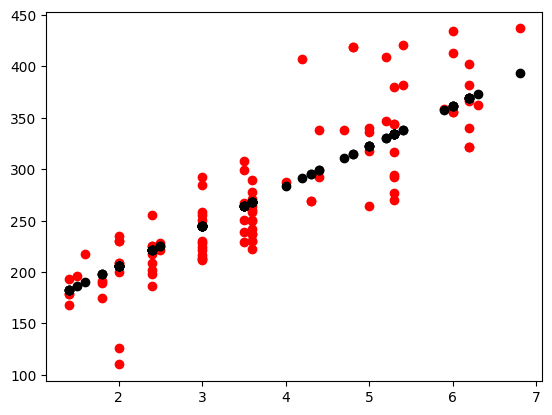

In [15]:
plt.scatter(X_test,y_test, color='red')
plt.scatter(X_test,out_robot, color='black', linewidths=1)
plt.show()

In [36]:
p206=np.array([[5.2,10,14.8]])

In [37]:
co2=model.predict(p206)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
co2

array([346.61442898])

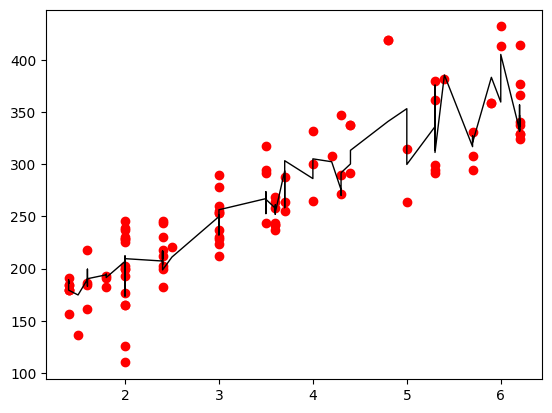

In [43]:
import numpy as np

# Sort X_test and corresponding out_robot values based on a single column
# (Here, 'engine' is chosen for demonstration)
sorted_indices = np.argsort(X_test['engine'])
X_test_sorted = X_test.iloc[sorted_indices]
out_robot_sorted = out_robot[sorted_indices]

plt.scatter(X_test['engine'], y_test, color='red')  # Access 'engine' column for scatter plot
plt.plot(X_test_sorted['engine'], out_robot_sorted, color='black', linewidth=1)  # Access 'engine' for prediction line
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, out_robot)

681.431156351191